# РК ИУ5

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
data = pd.read_csv('data.csv',sep = ';' )
data = data.fillna(0)

In [3]:
data.head()

,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,26.0,6.0,11.0,15.0,14.0,8.0
1,23.0,7.0,11.0,15.0,14.0,11.0
2,33.0,9.0,9.0,15.0,15.0,11.0
3,13.0,90.0,85.0,87.0,88.0,94.0
4,51.0,15.0,13.0,5.0,10.0,13.0


In [4]:
data.dtypes

SlidingTackle    float64
GKDiving         float64
GKHandling       float64
GKKicking        float64
GKPositioning    float64
GKReflexes       float64
dtype: object

In [5]:
data.isnull().sum()
# проверим есть ли пропущенные значения

SlidingTackle    0
GKDiving         0
GKHandling       0
GKKicking        0
GKPositioning    0
GKReflexes       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SlidingTackle  18207 non-null  float64
 1   GKDiving       18207 non-null  float64
 2   GKHandling     18207 non-null  float64
 3   GKKicking      18207 non-null  float64
 4   GKPositioning  18207 non-null  float64
 5   GKReflexes     18207 non-null  float64
dtypes: float64(6)
memory usage: 853.6 KB


In [7]:
data.head()

,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,26.0,6.0,11.0,15.0,14.0,8.0
1,23.0,7.0,11.0,15.0,14.0,11.0
2,33.0,9.0,9.0,15.0,15.0,11.0
3,13.0,90.0,85.0,87.0,88.0,94.0
4,51.0,15.0,13.0,5.0,10.0,13.0


<AxesSubplot:>

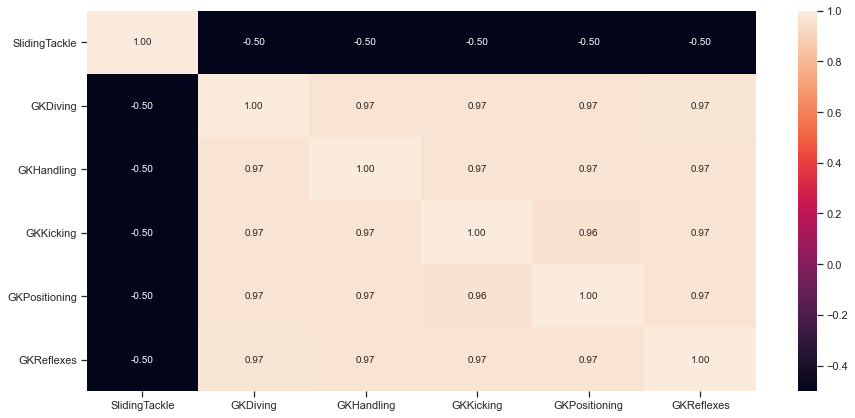

In [8]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [9]:
X = data.drop(['GKReflexes'], axis = 1)
Y = data.GKReflexes
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning
0           26.0       6.0        11.0       15.0           14.0
1           23.0       7.0        11.0       15.0           14.0
2           33.0       9.0         9.0       15.0           15.0
3           13.0      90.0        85.0       87.0           88.0
4           51.0      15.0        13.0        5.0           10.0 

Выходные данные:

 0     8.0
1    11.0
2    11.0
3    94.0
4    13.0
Name: GKReflexes, dtype: float64


In [10]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

        SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning
17929           49.0       8.0         5.0        6.0            8.0
10668           13.0      11.0        14.0       13.0            5.0
15882           39.0      11.0         7.0       13.0           12.0
14698           33.0      13.0         9.0       11.0            6.0
8509            62.0      14.0        12.0       12.0           11.0 

Входные параметры тестовой выборки:

        SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning
15885           38.0      10.0        11.0       12.0            9.0
13652           25.0      12.0         7.0        9.0            8.0
13522           56.0       6.0        15.0        9.0           16.0
7814            51.0      13.0        12.0       11.0            7.0
15904           60.0       7.0        14.0       12.0           15.0 

Выходные параметры обучающей выборки:

 17929    11.0
10668    14.0
15882     6.0
14698    

In [11]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)

In [ ]:
pred_y = svc.predict(X_test)

In [ ]:
plt.scatter(X_test.GKDiving, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.GKDiving, pred_y, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('GKDiving')
plt.ylabel ('GKReflexes')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

In [ ]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

In [ ]:
plt.scatter(X_test.GKDiving, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.GKDiving, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('GKDiving')
plt.ylabel('GKReflexes')
plt.show()